In [48]:
import cv2
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm.auto import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
train_df = pd.read_csv('../data/input/train.csv')
train2019_df = pd.read_csv('../data/input/train_2019.csv')
test_df = pd.read_csv('../data/input/test.csv')

In [43]:
def load_img(id_, img_dir='../data/input/jpeg_resized_384/train'):
    img = cv2.imread(f'{img_dir}/{id_}.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [44]:
train_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


## microscope


Train MicroScope: 34


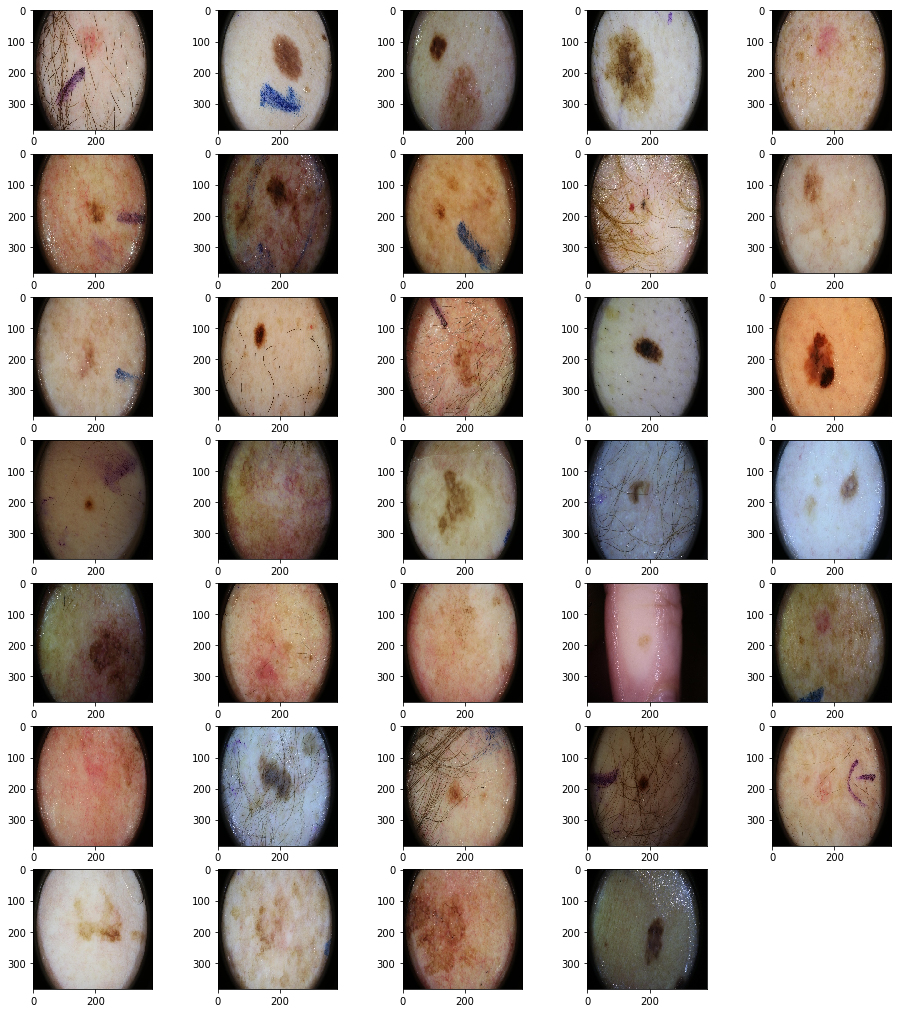

In [77]:
ms_list = []

for id_ in tqdm(train_df['image_name']):
    img = load_img(id_=id_)
    
    a = [
        np.mean(img[:, :10, :].reshape(-1)), 
        np.mean(img[:, -10:, :].reshape(-1))
    ]
    if np.mean(a) <= 10:
        ms_list.append(id_)
        
        
NUM = len(ms_list)
print(f'Train MicroScope: {NUM}')

plt.figure(figsize=(16, NUM // 5 * 3))
for i, id_ in enumerate(ms_list):
    img = load_img(id_= id_)
    plt.subplot((NUM // 5) + 1, 5, i + 1)
    plt.imshow(img)


Test MicroScope: 16


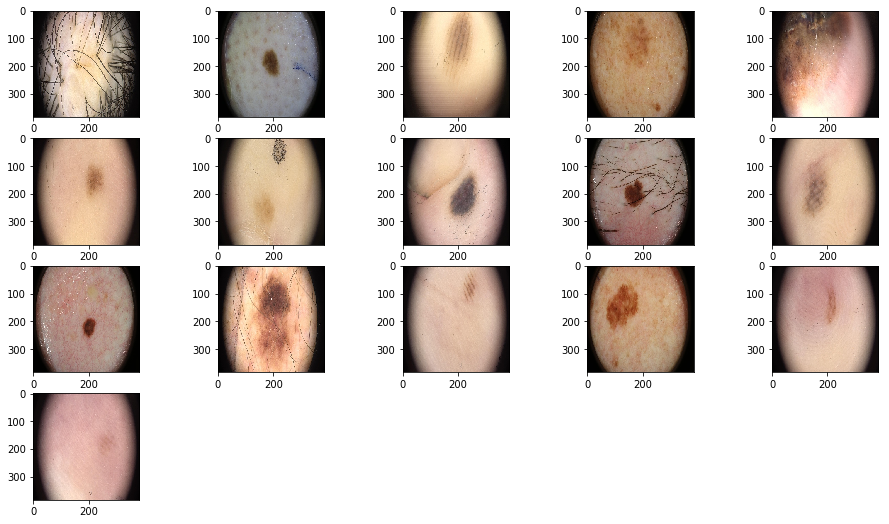

In [81]:
ms_list = []

for id_ in tqdm(test_df['image_name']):
    img = load_img(id_=id_, img_dir='../data/input/jpeg_resized_384/test')
    
    a = [
        np.mean(img[:, :10, :].reshape(-1)), 
        np.mean(img[:, -10:, :].reshape(-1))
    ]
    if np.mean(a) <= 10:
        ms_list.append(id_)
        
        
NUM = len(ms_list)
print(f'Test MicroScope: {NUM}')

plt.figure(figsize=(16, NUM // 5 * 3))
for i, id_ in enumerate(ms_list):
    img = load_img(id_= id_, img_dir='../data/input/jpeg_resized_384/test')
    plt.subplot((NUM // 5) + 1, 5, i + 1)
    plt.imshow(img)

In [83]:
ms_list = []

for id_ in tqdm(train2019_df['image_name']):
    img = load_img(id_=id_, img_dir='../data/input/2019_384/train')
    
    a = [
        np.mean(img[:, :10, :].reshape(-1)), 
        np.mean(img[:, -10:, :].reshape(-1))
    ]
    if np.mean(a) <= 10:
        ms_list.append(id_)
        
        
NUM = len(ms_list)
print(f'OldTrain MicroScope: {NUM}')

# plt.figure(figsize=(16, NUM // 5 * 3))
# for i, id_ in enumerate(ms_list):
#     img = load_img(id_= id_, img_dir='../data/input/2019_384/train')
#     plt.subplot((NUM // 5) + 1, 5, i + 1)
#     plt.imshow(img)


OldTrain MicroScope: 2550
